In [1]:
import numpy as np

In [2]:
# X1 = np.load('/kaggle/input/chess-stf-depth8/X_middle_1_0.500026.npy')
X2 = np.load('/kaggle/input/chess-stf-depth8/X_ending_1_0.500069.npy')
X3 = np.load('/kaggle/input/chess-stf-depth8/X_ending_2_0.744942.npy')
# X4 = np.load('/kaggle/input/chess-stf-depth8/X_middle_4_0.750007.npy')
X5 = np.load('/kaggle/input/chess-stf-depth8/X_ending_3_0.744155.npy')
X6 = np.load('/kaggle/input/chess-stf-depth8/X_ending_4_0.736644.npy')
X7 = np.load('/kaggle/input/chess-stf-depth8-part2/X_ending_9_0.822051.npy')
X8 = np.load('/kaggle/input/chess-stf-depth8/X_ending_8_0.739601.npy')

# X1 = np.load('/kaggle/input/chess-stf-depth8/X_middle_1_0.500026.npy')
y2 = np.load('/kaggle/input/chess-stf-depth8/y_ending_1_0.500069.npy')
y3 = np.load('/kaggle/input/chess-stf-depth8/y_ending_2_0.744942.npy')
# X4 = np.load('/kaggle/input/chess-stf-depth8/X_middle_4_0.750007.npy')
y5 = np.load('/kaggle/input/chess-stf-depth8/y_ending_3_0.744155.npy')
y6 = np.load('/kaggle/input/chess-stf-depth8/y_ending_4_0.736644.npy')
y7 = np.load('/kaggle/input/chess-stf-depth8-part2/y_ending_9_0.822051.npy')
y8 = np.load('/kaggle/input/chess-stf-depth8/y_ending_8_0.739601.npy')

In [3]:
# X1, X4, y1, y4 = [[]], [[]], [], []

In [3]:
import gc
gc.collect()

191

In [4]:
X = np.concatenate((X2,X3,X5,X6,X7,X8))
X2,X3,X5,X6,X7,X8 = [], [], [], [], [], []
gc.collect()
y = np.concatenate((y2,y3,y5,y6,y7,y8))
y2,y3,y5,y6,y7,y8 = [], [], [], [], [], []
y = y/100
gc.collect()

0

In [5]:
X_train, X_val, X_test = X[:-200000], X[-200000:-100000], X[-100000:]
X = None
gc.collect()

y_train, y_val, y_test = y[:-200000], y[-200000:-100000], y[-100000:]
y = None
gc.collect()

0

In [6]:
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=((384))))

model.add(Dense(units=512, activation='elu', name='Hidden_layer_1'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='elu', name='Hidden_layer_2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='elu', name='Hidden_layer_3'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(units=384, activation='elu', name='Hidden_layer_4'))

model.add(Dense(units=1, name='Output_layer'))

model.compile(optimizer='adam', loss='mae')

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_layer_1 (Dense)       (None, 512)               197120    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 512)               2

2023-02-01 15:09:07.108824: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
path = '/kaggle/working/ending_model_3layers_512neurals_1.h5'
checkpoint = keras.callbacks.ModelCheckpoint(path,
                                             monitor='val_loss',
                                             verbose=0,
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=512, callbacks=[checkpoint], validation_data=(X_val, y_val), validation_batch_size=512)

2023-02-01 15:36:27.832237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
7984/7984 [==============================] - 350s 44ms/step - loss: 4.8123 - val_loss: 4.9569
Epoch 2/20
7984/7984 [==============================] - 352s 44ms/step - loss: 4.4165 - val_loss: 4.6004
Epoch 3/20
7984/7984 [==============================] - 359s 45ms/step - loss: 4.2326 - val_loss: 4.4665
Epoch 4/20
7984/7984 [==============================] - 345s 43ms/step - loss: 4.1161 - val_loss: 4.3965
Epoch 5/20
7984/7984 [==============================] - 344s 43ms/step - loss: 4.0343 - val_loss: 4.3447
Epoch 6/20
7984/7984 [==============================] - 347s 43ms/step - loss: 3.9643 - val_loss: 4.2861
Epoch 7/20
  84/7984 [..............................] - ETA: 5:25 - loss: 3.9708

In [11]:
gc.collect()

1749

In [10]:
import matplotlib.pyplot as plt

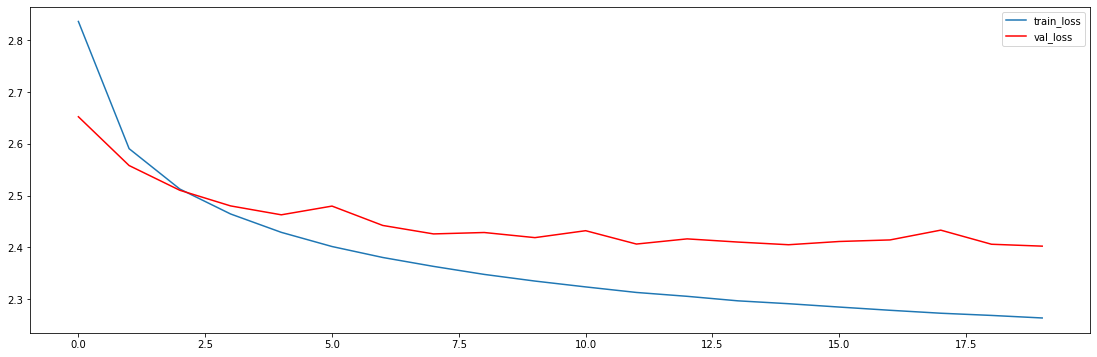

In [11]:
plt.figure(figsize=(19, 6))
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], c='red', label='val_loss')
plt.legend();

In [17]:
import time
from timeit import default_timer as timer
import tensorflow as tf

In [13]:
class LiteModel:
    
    @classmethod
    def from_file(cls, model_path):
        return LiteModel(tf.lite.Interpreter(model_path=model_path))
    
    @classmethod
    def from_keras_model(cls, kmodel):
        converter = tf.lite.TFLiteConverter.from_keras_model(kmodel)
        tflite_model = converter.convert()
        return LiteModel(tf.lite.Interpreter(model_content=tflite_model))
    
    def __init__(self, interpreter):
        self.interpreter = interpreter
        self.interpreter.allocate_tensors()
        input_det = self.interpreter.get_input_details()[0]
        output_det = self.interpreter.get_output_details()[0]
        self.input_index = input_det["index"]
        self.output_index = output_det["index"]
        self.input_shape = input_det["shape"]
        self.output_shape = output_det["shape"]
        self.input_dtype = input_det["dtype"]
        self.output_dtype = output_det["dtype"]
        
    def predict(self, inp):
        inp = inp.astype(self.input_dtype)
        count = inp.shape[0]
        out = np.zeros((count, self.output_shape[1]), dtype=self.output_dtype)
        for i in range(count):
            self.interpreter.set_tensor(self.input_index, inp[i:i+1])
            self.interpreter.invoke()
            out[i] = self.interpreter.get_tensor(self.output_index)[0]
        return out
    
    def predict_single(self, inp):
        """ Like predict(), but only for a single record. The input data can be a Python list. """
        inp = np.array([inp], dtype=self.input_dtype)
        self.interpreter.set_tensor(self.input_index, inp)
        self.interpreter.invoke()
        out = self.interpreter.get_tensor(self.output_index)
        return out[0]

In [15]:
model = keras.models.load_model('/kaggle/working/openning_model_3layers_512neurals_1.h5')

In [18]:
lmodel = LiteModel.from_keras_model(model)  # warm-up
start_time = timer()
lmodel = LiteModel.from_keras_model(model)
print(f'conversion time: {timer()-start_time:.6f} seconds')

2023-02-01 12:13:51.899282: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-02-01 12:13:53.407266: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2023-02-01 12:13:53.407468: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2023-02-01 12:13:53.412893: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.011ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2023-02-01 12:13:53.579492: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2023-02-01 12:13:53.579581: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:

conversion time: 2.441060 seconds


2023-02-01 12:13:56.183646: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2023-02-01 12:13:56.183714: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.


In [19]:
start_time = timer()
data_out = lmodel.predict_single(X_test[50])
print(f'lmodel-pseudobatch: {timer()-start_time:.6f} seconds')
print(data_out)


lmodel-pseudobatch: 0.002861 seconds
[1.316164]


In [20]:
def check_accuracy(model, X, y):
    n = len(X)
    true = 0
    error = 0
    for i in range(n):
        pred = model.predict_single(X[i])
        if (pred > 0) and (y[i] > 0):
            true += 1
        elif (pred < 0) and (y[i] < 0):
            true += 1
        else:
            error += np.absolute(y[i] - pred)
    return float(true/n), error/(n - true)


In [21]:
check_accuracy(lmodel, X_test, y_test)

(0.86778, array([1.3804129], dtype=float32))